## HEART DISEASE PREDICTION MODEL

### importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading the dataset

In [2]:
df=pd.read_csv("C://Users//ANKITA GHOSH//Desktop//heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### let's understand the data we have here..........

In [3]:
df.shape               #shape of the dataset

(303, 14)

In [4]:
df.sample(5)             #a sample from the whole dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


In [5]:
df.describe()                 # the description of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()                        #the information  about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()                  # there is no null values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### let's understand the features 

In [8]:
features=['age',
          '1:male, 0:female', 
          'chest pain type, 0:typical angina, 1:atypical angina, 2: non-anginal pain, 3:asymptotic',
          'resting blood pressure',
         'serum cholestoral in mg/dl',
         'fasting blood sugar>120 mg/dl',
         'resting electrocardiographic results (values 0,1,2)',
         'maximum heart rate achieved',
         'exercise induced angina',
         'oldpeak= ST depression induced by exercise relative to rest',
          'the slope of the peak exercise ST segment',
          'number of major vessels (0-3) colored by flourosopy',
          'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect'] 

In [9]:
for i in range(len(features)):
    print(df.columns[i]+':\t\t\t'+features[i])

age:			age
sex:			1:male, 0:female
cp:			chest pain type, 0:typical angina, 1:atypical angina, 2: non-anginal pain, 3:asymptotic
trestbps:			resting blood pressure
chol:			serum cholestoral in mg/dl
fbs:			fasting blood sugar>120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak= ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### The last column 'target' is our target variable : dependent variable

### lets understand that....

In [10]:
df['target'].unique()

array([1, 0], dtype=int64)

### clearly, this is a classification problem...........
1 : with heart disease
0 : without heart disease

In [11]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

### this shows that........... 

In [12]:
print(df.corr()['target'].abs().sort_values(ascending=True))

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64


## EDA

In [13]:
import warnings
warnings.filterwarnings('ignore')

1    165
0    138
Name: target, dtype: int64


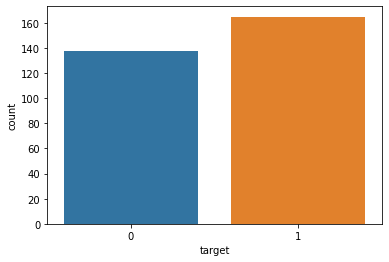

In [14]:
y=df['target']
sns.countplot(y)
target_ = df.target.value_counts()
print(target_)

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

<AxesSubplot:xlabel='sex', ylabel='target'>

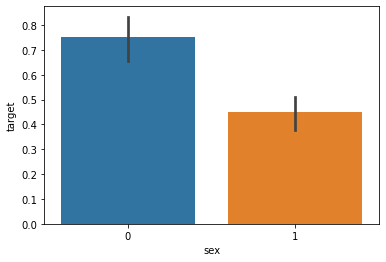

In [15]:
sns.barplot(df['sex'],y)

##### it's surprising that FEMALES  are  MORE LIKELY TO HAVE HEART PROBLEMS than MALES

#### Analysing 'chest pain type ' column

In [16]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

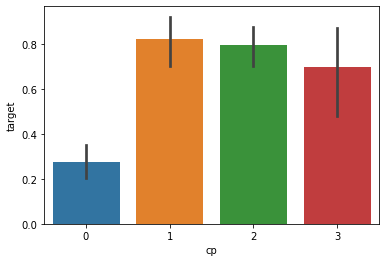

In [17]:
sns.barplot(df['cp'],y)

#### it shows that 1 i.e,'atypical angina' are most likely to have a heart disease

### analysing the 'fbs' column...

In [18]:
df['fbs'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

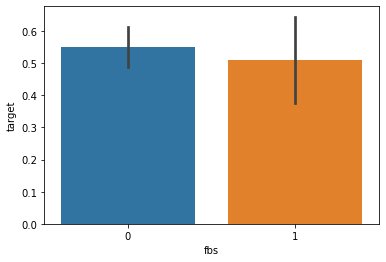

In [19]:
sns.barplot(df['fbs'],y)

##### that means 'sugar level' is not showing any valuable insight here

### restecg : ecg results......lets analyse

<AxesSubplot:xlabel='restecg', ylabel='target'>

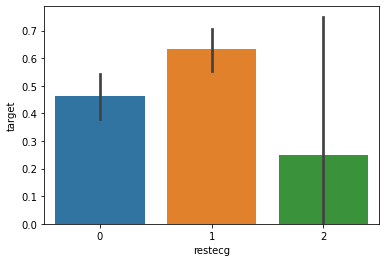

In [20]:
sns.barplot(df['restecg'],y)

#### the result '1' have high chances !!!

### train test split

In [21]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## model

### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [24]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### KNN 

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

print(df)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")